## BUSINESS UNDERSTANDING
### Overview
To expand its market footprint and diversify its investment portfolio, a company is preparing to enter the aviation sector. This initiative involves acquiring aircrafts to operate within both commercial and private aviation markets. Given the significant risks associated with air travel-ranging from mechanical failure and environmental hazards to pilot error and maintenance practices-it is imperative that the company make data-informed decisions regarding aircraft selection.

### Business Problem
The organization currently lacks knowledge about the risk profiles of different aircraft models. Without a clear understanding of historical accident patterns, the company could unknowingly invest in aircraft with poor safety records, resulting in potential financial loss, reputational damage, and regulatory complications. Therefore, leadership has tasked the data team (me) with identifying the **lowest-risk aircraft models** to guide strategic procurement.

### Project Objective
The objective of this project is to analyze historical aviation accident data to evaluate and compare the safety performance of different aircraft models. The goal is to translate this analysis into **three clear business recommendations** that will inform the Aviation Division’s purchasing decisions.

This involves:
- Identifying aircraft models with consistently low accident frequencies or severities.
- Understanding trends across aircraft manufacturers, types, and use cases (commercial vs. private).
- Assessing the impact of contributing factors such as pilot error, equipment failure, weather conditions, or operational mismanagement.

### Business Goals
- **Minimize Risk**: Recommend aircraft with the lowest historical accident rates to reduce the risk exposure for the business.
- **Support Procurement**: Provide a ranked list or categorical insights on safe aircraft for commercial and private deployment.
- **Enable Strategic Planning**: Use historical data trends to anticipate long-term implications of choosing particular aircraft.

### Success Criteria
- Delivery of **three actionable and evidence-based business recommendations** supported by visual insights.
- Development of an **interactive dashboard** that allows business stakeholders to explore aircraft risk profiles.
- A **non-technical presentation** and a **well-documented Jupyter Notebook** that together communicate the methodology, findings, and value of the analysis.

### INITIAL DATA EXPLORATION (IDE)
- Load the first 5 rows of the dataset.
- Import relevant libraries that will be used for analysis.
- Understanding the size and structure of the dataset.

In [228]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
aviation_data = pd.read_csv(r'Data\AviationData.csv', encoding = 'ISO-8859-1')

aviation_data.head()

c:\Users\lenovo\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [229]:
# ==================== [IDE - Initial Data Exploration] ====================

# Find out how many rows and columns I am working with
print(f"The dataset contains {aviation_data.shape[0]} rows and {aviation_data.shape[1]} columns\n")

# Print column names to check for standardization/renaming needs
print("Column Names:\n", aviation_data.columns, "\n")

The dataset contains 88889 rows and 31 columns

Column Names:
 Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object') 



In [230]:
# Standardize columns for easier readability
aviation_data.columns = (aviation_data.columns.str.strip().str.lower().str.replace(".", "_"))

# Preview changes
aviation_data.sample(2) 

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
54798,20030617X00888,Accident,LAX03LA188,2003-06-09,"MARICOPA, AZ",United States,33.085277,-111.646389,NaN,NaN,...,Aerial Application,NaN,NaN,NaN,1.0,NaN,VMC,Maneuvering,Probable Cause,28-12-2004
45447,20001211X11550,Accident,DEN99LA028,1998-12-27,"CANON CITY, CO",United States,NaN,NaN,IV6,FREEMONT COUNTY AIRPORT,...,Personal,NaN,0.0,1.0,1.0,0.0,VMC,Takeoff,Probable Cause,16-02-2001


In [231]:
# Get metadata information
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                88889 non-null  object 
 1   investigation_type      88889 non-null  object 
 2   accident_number         88889 non-null  object 
 3   event_date              88889 non-null  object 
 4   location                88837 non-null  object 
 5   country                 88663 non-null  object 
 6   latitude                34382 non-null  object 
 7   longitude               34373 non-null  object 
 8   airport_code            50249 non-null  object 
 9   airport_name            52790 non-null  object 
 10  injury_severity         87889 non-null  object 
 11  aircraft_damage         85695 non-null  object 
 12  aircraft_category       32287 non-null  object 
 13  registration_number     87572 non-null  object 
 14  make                    88826 non-null

In [232]:
# Getter a better view of all numeric variables
numeric_cols = aviation_data.select_dtypes(include = 'number')

for col in numeric_cols:
    print(col)

number_of_engines
total_fatal_injuries
total_serious_injuries
total_minor_injuries
total_uninjured


In [233]:
# Get a better view of all categorical variables
categorical_cols = aviation_data.select_dtypes(include = 'object')

for col in categorical_cols:
    print(col)


event_id
investigation_type
accident_number
event_date
location
country
latitude
longitude
airport_code
airport_name
injury_severity
aircraft_damage
aircraft_category
registration_number
make
model
amateur_built
engine_type
far_description
schedule
purpose_of_flight
air_carrier
weather_condition
broad_phase_of_flight
report_status
publication_date


In [274]:
aviation_data.describe()

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [234]:
# Get basic statistical summary of all columns
aviation_data.describe(include = "O").T

,count,unique,top,freq
event_id,88889,87951,20001214X45071,3
investigation_type,88889,2,Accident,85015
accident_number,88889,88863,ERA22LA103,2
event_date,88889,14782,1984-06-30,25
location,88837,27758,"ANCHORAGE, AK",434
country,88663,219,United States,82248
latitude,34382,25592,332739N,19
longitude,34373,27156,0112457W,24
airport_code,50249,10375,NONE,1488
airport_name,52790,24871,Private,240


In [235]:
# Check for duplicates
print("Duplicates:", aviation_data.duplicated().sum())

# Check for nulls and get their percentage to advice on best imputing or dropping criteria
null_counts = aviation_data.isna().sum()
null_percent = (null_counts / len(aviation_data)) * 100
null_summary = pd.DataFrame({'Null Count': null_counts, 'Null %': null_percent.round(2)})

print("\nNull Values Summary:\n", null_summary)

Duplicates: 0

Null Values Summary:
                         Null Count  Null %
event_id                         0    0.00
investigation_type               0    0.00
accident_number                  0    0.00
event_date                       0    0.00
location                        52    0.06
country                        226    0.25
latitude                     54507   61.32
longitude                    54516   61.33
airport_code                 38640   43.47
airport_name                 36099   40.61
injury_severity               1000    1.12
aircraft_damage               3194    3.59
aircraft_category            56602   63.68
registration_number           1317    1.48
make                            63    0.07
model                           92    0.10
amateur_built                  102    0.11
number_of_engines             6084    6.84
engine_type                   7077    7.96
far_description              56866   63.97
schedule                     76307   85.85
purpose_of_flight

## DATA UNDERSTANDING

### Data Source

The dataset used in this analysis is sourced from the **National Transportation Safety Board (NTSB)** and contains records of civil aviation accidents and selected incidents from **1962 to 2023**. The data covers both U.S.-based incidents and those that occurred in international waters involving U.S.-registered aircraft.

- **File Type**: CSV
- **Size**: Dataset has 88889 rows and 31 columns
- **Period Covered**: 1962–2023
- **Scope**: Includes variables on aircraft make/model, accident severity, causes, weather conditions, flight purpose, location, and fatalities/injuries.

### Data Structure

Key columns that I will consider in the dataset include:

| Column Name           | Description                                                                                                                 |
|-----------------------|-----------------------------------------------------------------------------------------------------------------------------|
| make                  | Manufacturer of the aircraft                                                                                                |
| model                 | Model of the aircraft                                                                                                       |
| aircraft_damage       | Severity of aircraft damage (e.g., Destroyed, Substantial, Minor)                                                           |
| injury_severity       | Level of injury/fatalities (e.g., Fatal, Non-Fatal, None)                                                                   |
| purpose_of_flight     | Reason for flight (e.g., Personal, Business, Commercial, Instructional)                                                     |
| broad_phase_of_flight | Flight phase during which the incident occurred (e.g., Takeoff, Landing)                                                    |
| weather_condition     | Weather during the incident (e.g., VMC - Visual Meteorological Conditions)                                                  |
| engine_type           | The type of engine of the aircraft (e.g., Reciprocating, Turbo Fan, Turbo Jet, etc.)                                        |
| amateur_built         | Indicates whether the aircraft was amateur/home-built (Yes or No)                                                           |
| total_fatal_injuries  | Total number of individuals fatally injured in the accident, including passengers, crew, and possibly people on the ground. |
| number_of_engines     | Total number of engines installed on the aircraft involved in the accident.                                                 |
| country               | Country in which the incident occurred, used to distinguish between domestic and international operations.                  |

### Initial Observations

- **Duplicates**: Zero (0)
- **Missing/Null Values**: Missing data is prevalent across several columns- some like 'schedule' have 85% of it having missing values.
- The dataset is largely comprised of categorical variables with the exception of 'number_of_engines', 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries' and 'total_uninjured' which are numeric variables. These may require normalisation.
- The dataset spans **over six decades**, making time-based trend analysis highly feasible.
- The columns **'make'** and **'model'** are critical for this analysis since they relate directly to the business question on **aircraft risk assessment**.

### Data Quality Issues

- **Missing Values**: Several fields contain nulls or blank strings. These must be investigated for relevance and either imputed, ignored, or used as-is depending on the column.
- **Inconsistent Labeling**: Categorical values such as 'aircraft_damage' or 'purpose_of_flight' may be inconsistent (e.g., "business" vs "Business") and will require standardization.
- **Outliers**: Check if outliers exist in fields like 'event_date', 'pubication_date' (among others) and must be handled with care.

## Next Steps

- Perform data cleaning and preprocessing.
- Explore distributions of key fields (e.g., damage, injury, make/model frequency).
- Diagnostic analysis, Descriptive analysis and Prescriptive analysis which will include uni-variate, bi-variate and multi-variate analysis. This will be done by creating visualisation and interpreting them.

### DATA CLEANING
- Impute missing data with appropriate imputation method- median, mode or using a placeholder
- Standardise entries that need standardisation.
- Check for outliers in relevant columns and deal with them appropriately. 
- Feature engineering.
- Archive columns I will not need/use for the analysis.
- Save both cleaned and archived data

In [236]:
# ==================== [1. make] ====================

# Find null count in 'make' column
print("Null Values in 'make':", aviation_data['make'].isna().sum())

# Get unique values in 'make' column
print("\nUnique values in 'make':\n", aviation_data['make'].unique())

# Standardize 'make' column fields
aviation_data['make'] = aviation_data['make'].str.strip().str.title()

# See the 15 most common aircraft makes
print("\nThe 15 Most Common Aircraft Makes are:\n", aviation_data['make'].value_counts().head(15))


Null Values in 'make': 63

Unique values in 'make':
 ['Stinson' 'Piper' 'Cessna' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']

The 15 Most Common Aircraft Makes are:
 Cessna               27149
Piper                14870
Beech                 5372
Boeing                2745
Bell                  2722
Mooney                1334
Robinson              1230
Grumman               1172
Bellanca              1045
Hughes                 932
Schweizer              773
Air Tractor            691
Aeronca                636
Mcdonnell Douglas      608
Maule                  589
Name: make, dtype: int64


In [237]:
# ==================== [2. model] ====================

# Count null values in 'model'
print("\nNull Values in 'model':", aviation_data['model'].isna().sum())

# Display unique values in 'model'
print("\nUnique 'model':\n", aviation_data['model'].unique())

# Strip whitespace from entries in 'model'
aviation_data['model'] = aviation_data['model'].str.strip()

# Display top 15 most frequent aircraft models
print("\nTop 15 Aircraft Models:\n", aviation_data['model'].value_counts().head(15))



Null Values in 'model': 92

Unique 'model':
 ['108-3' 'PA24-180' '172M' ... 'ROTORWAY EXEC 162-F' 'KITFOX S5'
 'M-8 EAGLE']

Top 15 Aircraft Models:
 152          2367
172          1756
172N         1164
PA-28-140     932
150           829
172M          798
172P          689
182           659
180           622
150M          585
PA-18         581
PA-18-150     578
PA-28-180     572
PA-28-161     569
PA-28-181     532
Name: model, dtype: int64


## Aircraft Identifier Creation (1- make, 2- model)
Combine make and model to create a unified aircraft identifier.

In this section, I perform data cleaning and feature engineering on the make and model columns. These two fields describe the manufacturer and specific type of aircraft involved in each incident—both are critical to the risk analysis I am conducting.

#### Steps Taken:
**1. Null Handling:** Missing values in both make and model are replaced with "Not Reported" to avoid introducing bias by using imputation techniques like mode.This approach maintains transparency in the data and ensures no row is dropped unnecessarily during analysis.

**2. Standardization:** Leading and trailing whitespaces are stripped using .str.strip() to prevent inconsistencies like " Cessna" and "Cessna ".
The make column is standardized to title case using .str.title() (e.g., "CESSNA" becomes "Cessna"), while the model column is converted to uppercase using .str.upper() (e.g., "172n" becomes "172N"). This ensures a consistent naming convention for both fields.

**3. Feature Engineering:** A new combined field make_model is created by concatenating make and model. This new column will be helpful when performing grouped analysis, plotting, or aggregating data by specific aircraft types.

This ensures the integrity of subsequent analyses involving aircraft manufacturers and models.

In [238]:
# ==================== [CLEANING make & model] ====================

# 1. make
aviation_data['make'] = (
    aviation_data['make']
    .fillna('Not Reported')
    .str.strip()
    .str.title()
)

# 2. model
aviation_data['model'] = (
    aviation_data['model']
    .fillna('Not Reported')
    .str.strip()
    .str.upper()
)

# 3. Combine into 'make_model'
aviation_data['make_model'] = aviation_data['make'] + ' ' + aviation_data['model']

# Preview changes
aviation_data['make_model'].head(7)

0            Stinson 108-3
1           Piper PA24-180
2              Cessna 172M
3             Rockwell 112
4               Cessna 501
5    Mcdonnell Douglas DC9
6               Cessna 180
Name: make_model, dtype: object

## 3. Exploring the 'injury_severity' Column

Check for missing values and list all unique entries in the 'injury_severity' column. 
The goal is to understand the variety and quality of entries, which will guide cleaning and standardization decisions.


In [ ]:
# Get null counts in injury_severity column
print("Null values in 'injury_severity' are:", aviation_data['injury_severity'].isna().sum())

# Get unique values in injurity_severity to inform on the best imputation method
print("\nUnique Values in 'injury_severity':\n", aviation_data['injury_severity'].unique())

Null values in 'injury_severity' are: 1000

Unique Values in 'injury_severity':
 ['Fatal(2)' 'Fatal(4)' 'Fatal(3)' 'Fatal(1)' 'Non-Fatal' 'Incident'
 'Fatal(8)' 'Fatal(78)' 'Fatal(7)' 'Fatal(6)' 'Fatal(5)' 'Fatal(153)'
 'Fatal(12)' 'Fatal(14)' 'Fatal(23)' 'Fatal(10)' 'Fatal(11)' 'Fatal(9)'
 'Fatal(17)' 'Fatal(13)' 'Fatal(29)' 'Fatal(70)' 'Unavailable'
 'Fatal(135)' 'Fatal(31)' 'Fatal(256)' 'Fatal(25)' 'Fatal(82)'
 'Fatal(156)' 'Fatal(28)' 'Fatal(18)' 'Fatal(43)' 'Fatal(15)' 'Fatal(270)'
 'Fatal(144)' 'Fatal(174)' 'Fatal(111)' 'Fatal(131)' 'Fatal(20)'
 'Fatal(73)' 'Fatal(27)' 'Fatal(34)' 'Fatal(87)' 'Fatal(30)' 'Fatal(16)'
 'Fatal(47)' 'Fatal(56)' 'Fatal(37)' 'Fatal(132)' 'Fatal(68)' 'Fatal(54)'
 'Fatal(52)' 'Fatal(65)' 'Fatal(72)' 'Fatal(160)' 'Fatal(189)'
 'Fatal(123)' 'Fatal(33)' 'Fatal(110)' 'Fatal(230)' 'Fatal(97)'
 'Fatal(349)' 'Fatal(125)' 'Fatal(35)' 'Fatal(228)' 'Fatal(75)'
 'Fatal(104)' 'Fatal(229)' 'Fatal(80)' 'Fatal(217)' 'Fatal(169)'
 'Fatal(88)' 'Fatal(19)' 'Fatal(60)' 'Fa

In [240]:
# Further inspect this column against other related columns
# Related columns- total_fatal_injuries, total_minor_injuries, total_uninjured, total_serious_injuries

aviation_data[['injury_severity', 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured']].head()

,injury_severity,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
0,Fatal(2),2.0,0.0,0.0,0.0
1,Fatal(4),4.0,0.0,0.0,0.0
2,Fatal(3),3.0,NaN,NaN,NaN
3,Fatal(2),2.0,0.0,0.0,0.0
4,Fatal(1),1.0,2.0,NaN,0.0


### Cleaning and Standardizing 'injury_severity'

Handling inconsistencies in the 'injury_severity' column. 
1. Remove whitespace and standardizes values like 'Fatal(1)' to a uniform 'Fatal' label. 

In [241]:
# Standardize injury_severity fields
aviation_data['injury_severity'] = aviation_data['injury_severity'].str.strip()

# Standardize 'Fatal(...)' as just 'Fatal'
aviation_data['injury_severity'] = aviation_data['injury_severity'].str.replace(r'Fatal\(\d+\)', 'Fatal', regex = True)

print("Unique Values in 'injury_severity':\n", aviation_data['injury_severity'].unique())

aviation_data['injury_severity'].value_counts()

Unique Values in 'injury_severity':
 ['Fatal' 'Non-Fatal' 'Incident' 'Unavailable' nan 'Minor' 'Serious']


Non-Fatal      67357
Fatal          17826
Incident        2219
Minor            218
Serious          173
Unavailable       96
Name: injury_severity, dtype: int64

2. Create a mapping dictionary to use to consolidate entries into five main categories: 'Fatal', 'Serious', 'Minor', 'No Injury', and 'Not Reported'.
 Incident and Non Fatal are used to refer to the same thing by NTSB Standardisation metrics 

In [242]:
# Make 5 clean categories from injury_severity: Fatal, Serious, Minor, No Injury and Unknown

# Mapping dictionary
severity_map = {
    'Fatal': 'Fatal',
    'Serious': 'Serious',
    'Minor': 'Minor',
    'Non-Fatal': 'No Injury',
    'Incident': 'No Injury',
    'Unavailable': 'Not Reported'
}

# Apply mapping
aviation_data['injury_severity'] = aviation_data['injury_severity'].replace(severity_map)

# Check value counts after mapping
aviation_data['injury_severity'].value_counts()

No Injury       69576
Fatal           17826
Minor             218
Serious           173
Not Reported       96
Name: injury_severity, dtype: int64

3. By NTSB Standards:
**nan:** means the record was incomplete or this is a missing data entry. Could be due to inconclusive investigation or ingestion issue. Could thus mean the same thing as Not Reported. As such, I will replace nan with 'Not Reported'

This preserves transparency and avoids introducing statistical bias through imputation with mode or other techniques. 
Additionally, since Not reported already existed in the dataset, it stands to reason that filling it with Not Reported is the best parctice.

In [243]:
# ====================== [Clean injury_severity] ====================

# Fill nan with 'Not Reported' to maintain transparency. NaN technically means that this data is unavailable- airgo, not reported
# Using mode would introduce bias

aviation_data['injury_severity'] = aviation_data['injury_severity'].fillna('Not Reported')
print("Null values in 'injury_severity' after imputation:", aviation_data['injury_severity'].isna().sum())

# Preview changes
print("\nUnique Value counts after imputation:\n", aviation_data['injury_severity'].value_counts())

Null values in 'injury_severity' after imputation: 0

Unique Value counts after imputation:
 No Injury       69576
Fatal           17826
Not Reported     1096
Minor             218
Serious           173
Name: injury_severity, dtype: int64


### 4. Exploring and Cleaning 'aircraft_damage'

Examining the 'aircraft_damage' column to assess data completeness and understand the variety of reported outcomes.


In [ ]:
# Check how many nulls are in aircraft_damage
print("Null Values in 'aircraft_damage':", aviation_data['aircraft_damage'].isna().sum())

# Check unique values to get a better understanding of the column
print("\nUnique Values in 'aircraft_damage':", aviation_data['aircraft_damage'].unique())

# Check value counts for the unique values to inform on the best imputation method
print("\nValue Counts of unique counts in 'aircraft_damage':\n", aviation_data['aircraft_damage'].value_counts())

Null Values in 'aircraft_damage': 3194

Unique Values in 'aircraft_damage': ['Destroyed' 'Substantial' 'Minor' nan 'Unknown']

Value Counts of unique counts in 'aircraft_damage':
 Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: aircraft_damage, dtype: int64


- **Null Values**: These are likely due to incomplete reports or administrative gaps. Will fill them with 'Not Reported' to preserve analytical transparency.
- **'Unknown' Entries**: I will preserve these, since they reflect legitimate investigation limitations rather than missing data.

Imputing with the most common category would misrepresent unknown or unreported events and bias any insights about aircraft risk.

In [245]:
# ==================== [Clean aircraft_damage] ====================

# nan - unreported damage due to administrative oversight or a low priority incident. Replace with 'Not Reported'.
# Unknown - investigation could not determine the extent of the damage. Could be due to destruction, lack of recovery etc etc. Leave as is.
# Using mode would introduce bias

aviation_data['aircraft_damage'] = aviation_data['aircraft_damage'].fillna('Not Reported') # Use placeholder to fill NaN
print("Null values in 'aircraft_damage' after imputation:", aviation_data['aircraft_damage'].isna().sum())

# Preview changes
print("\nUnique value counts after imputation:\n", aviation_data['aircraft_damage'].value_counts())

Null values in 'aircraft_damage' after imputation: 0

Unique value counts after imputation:
 Substantial     64148
Destroyed       18623
Not Reported     3194
Minor            2805
Unknown           119
Name: aircraft_damage, dtype: int64


### 5. Exploring and Cleaning 'weather_condition'

Analyze and clean the 'weather_condition' column, which is critical in understanding environmental factors contributing to aviation incidents.

In [ ]:
# Check null value count
print("Null Values in 'weather_condition':", aviation_data['weather_condition'].isna().sum())

# Check unique values to get a better understanding of the column
print("\nUnique Values in 'weather_condition':", aviation_data['weather_condition'].unique())

# Check value counts for the unique values to inform on the best imputation method
print("\nValue Counts of unique counts in 'weather_condition':\n", aviation_data['weather_condition'].value_counts())

Null Values in 'weather_condition': 4492

Unique Values in 'weather_condition': ['UNK' 'IMC' 'VMC' nan 'Unk']

Value Counts of unique counts in 'weather_condition':
 VMC    77303
IMC     5976
UNK      856
Unk      262
Name: weather_condition, dtype: int64


- **Null Values**: Likely indicates weather data was not recorded or unavailable during investigation. Will impute these with 'Not Reported' for clarity in analysis.
- **'UNK' / 'Unk'**: Standardise this to Unknown, aligning with NTSB's inconsistent but common usage.
- **'Unknown' vs. 'Not Reported'**: 'Unknown' reflects investigation limitations; 'Not Reported' means the data wasn’t captured or logged. Treating them separately prevents analytical distortion.

This approach maintains analytical accuracy while preserving the integrity of missing or inconclusive weather data.

In [247]:
# ==================== [Clean weather_condition] ====================

# nan - weather was not recorded or could not be extracted from black box. Fill with 'Not Reported'
# UNK/Unknown - the investigation could not retrieve conditions due to destroyed logs. Leave as is.

print("Null Values in 'weather_condition' after imputation:", aviation_data['weather_condition'].isna().sum())

# Standardise UNK and Unk as 'Unknown' since NTSB uses either to refer to Unknown
aviation_data['weather_condition'] = aviation_data['weather_condition'].replace({'UNK': 'Unknown', 'Unk': 'Unknown'})

# Fill NaN with 'Unknown' to maintain transparency
aviation_data['weather_condition'] = aviation_data['weather_condition'].fillna('Not Reported')
print("\nUnique value counts for 'weather_condition' after imputation:\n", aviation_data['weather_condition'].value_counts())

Null Values in 'weather_condition' after imputation: 4492

Unique value counts for 'weather_condition' after imputation:
 VMC             77303
IMC              5976
Not Reported     4492
Unknown          1118
Name: weather_condition, dtype: int64


### 6. Exploring and Cleaning purpose_of_flight

In [ ]:
# Check Null value count in purpose_of_flight
print("Null Values in 'purpose_of_flight':", aviation_data['purpose_of_flight'].isna().sum())

# Check unique values to advice on best imoutation method
print("\nUnique Values in 'purpose_of_flight':\n", aviation_data['purpose_of_flight'].unique())

Null Values in 'purpose_of_flight': 6192

Unique Values in 'purpose_of_flight':
 ['Personal' nan 'Business' 'Instructional' 'Unknown' 'Ferry'
 'Executive/corporate' 'Aerial Observation' 'Aerial Application'
 'Public Aircraft' 'Skydiving' 'Other Work Use' 'Positioning'
 'Flight Test' 'Air Race/show' 'Air Drop' 'Public Aircraft - Federal'
 'Glider Tow' 'Public Aircraft - Local' 'External Load'
 'Public Aircraft - State' 'Banner Tow' 'Firefighting' 'Air Race show'
 'PUBS' 'ASHO' 'PUBL']


This column captures the intent behind each flight (e.g., Personal, Commercial, Instructional). Understanding this helps categorize operational risks more precisely.

- **Null Values**: Represent unrecorded or missing entries—likely due to oversight or non-disclosure. Will impute these with 'Not Reported' to retain transparency without misclassification.
- **'Unknown'**: Indicates that the flight's purpose could not be determined, possibly due to a lack of flight logs. Preserve as-is.
- **Legacy Codes**: Older NTSB records use abbreviations such as 'PUBS', 'PUBL', and 'ASHO'. Map these to their corresponding descriptive terms (Public Aircraft, Aerial Short-Haul Ops) to standardize interpretation.

This ensures the column is consistent, interpretable, and retains original context necessary for downstream risk profiling.

In [249]:
# ==================== [Clean purpose_of_flight] ====================

# nan - investigators and reportinhg party did not fill out. Impute with 'Not Report'
# Unknown - undeterminable. No log. Leave as is

aviation_data['purpose_of_flight'] = aviation_data['purpose_of_flight'].fillna('Not Reported')

# Preview changes made
print("Null Values after imputation:", aviation_data['purpose_of_flight'].isna().sum()) 

# PUBS - Older NTSB standard of specifying Public Aircraft
# ASHO - Older NTSB standard for specifying Aerial Short-Haul Ops
# PUBL - Older NTSB standard of specifying Public Aircraft

# Mapping dictionary
purpose_of_flight_map = {
    'PUBS': 'Public Aircraft',
    'ASHO': 'Aerial Short-Haul Ops',
    'PUBL': 'Public Aircraft'
}

# Apply mapping
aviation_data['purpose_of_flight'] = aviation_data['purpose_of_flight'].replace(purpose_of_flight_map)

# Preview changes
print("\nNew count after mapping:\n", aviation_data['purpose_of_flight'].value_counts())

Null Values after imputation: 0

New count after mapping:
 Personal                     49448
Instructional                10601
Unknown                       6802
Not Reported                  6192
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                725
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
Aerial Short-Haul Ops            6
Name: purpose_of_flight, dtype: int64


### 7. Exploring and Cleaning engine_type

This column specifies the propulsion system used by the aircraft (e.g Turbo Fan, Reciprocating, Electric). This attribute plays a crucial role in understanding aircraft capabilities and potential risks.

In [ ]:
# Check for null values in engine_type
print("Null Valiues in 'engine_type':", aviation_data['engine_type'].isna().sum())

# Check unique values to advice on best imoutation method
print("\nUnique Values in 'engine_type':\n", aviation_data['engine_type'].unique())

Null Valiues in 'engine_type': 7077

Unique Values in 'engine_type':
 ['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'None' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR'
 'NONE' 'UNK']


- **Null Values**: Likely indicate that the engine type was not submitted in the report. These will be replaced with 'Not Reported' to maintain transparency without assumptions.
- **'UNK'**: Implies the engine was found but the type could not be identified due to severe damage. Standardize to 'Unknown'.
- **'NONE'** and **None**: Both indicate that the aircraft had no engine installed (e.g gliders). These will be unified as 'Non'` for consistency.

This step ensures standardized, readable categories while preserving data authenticity critical for downstream analyses like risk classification and engine-type-based incident trends.

In [251]:
# ==================== [Clean engine_type] ====================

# nan - not submitted. Replace with 'Not Reported' to maintain transparency and data integrity
# UNK - engine submitted but type unclear due to extensive damage. Convert to 'Unknown'
# NONE - no engine present. Convert to None for consistency and readability.
# None - no engine present. Leave as is.

aviation_data['engine_type'] = aviation_data['engine_type'].fillna('Not Reported')
print("Null Values after imputation:", aviation_data['engine_type'].isna().sum()) # confirm

# UNK, Unknown, None, nan, NONE all mean the same thing
# Mapping dictionary
engine_map = {
    'UNK': 'Unknown',
    'NONE': 'None',
}

# Apply mapping
aviation_data['engine_type'] = aviation_data['engine_type'].replace(engine_map)

# Preview changes 
print("\nNew count after mapping:\n", aviation_data['engine_type'].value_counts())

Null Values after imputation: 0

New count after mapping:
 Reciprocating      69530
Not Reported        7077
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2052
Turbo Jet            703
None                  21
Geared Turbofan       12
Electric              10
LR                     2
Hybrid Rocket          1
Name: engine_type, dtype: int64


### 8. Exploring and Cleaning number_of_engines

This feature is critical in assessing aircraft complexity, power redundancy, and associated risk. However, it contains numeric values (as floats) and missing entries (nan)

**Problem**:  
  - 'nan' values hinder analysis and visualizations.
  - Filling 'nan' with a string like 'Not Reported' prevents conversion to integers for numeric analysis.

**Solution**:  
After extensive research (and a sleepless night), I decided I shall take a dual-column approach:
  - 'number_of_engines': Maintains numeric integrity for computations and aggregations, with 'nan' preserved.
  - 'engine_count_display': A visualization-friendly version where 'nan' is replaced with 'Not Reported' and values are converted to string for consistent display on plots or dashboards.

This method balances analytical precision with presentation clarity.

In [ ]:
# Check null counts
print("Null values in 'number_of_engines':", aviation_data['number_of_engines'].isna().sum())

# Check unique value counts in 'number_of_engines'
print("\nUnique value counts in 'number_of_engines':\n", aviation_data['number_of_engines'].value_counts())


# ==================== [Clean number_of_engines] ====================

# This column contains float and NaN.
# Filling NaN with 'Not Reported' distorts the data.
# Leaving NaN affects visual analysis.
# Solution: Create two separate columns—one for analysis, another for visualization.

# 1. Numeric column for analysis (keep NaNs)
aviation_data['number_of_engines'] = pd.to_numeric(aviation_data['number_of_engines'], errors = 'coerce')

# 2. Display column for visualizations (fill NaNs for readability)
aviation_data['engine_count_display'] = (aviation_data['number_of_engines'].fillna('Not Reported').astype(str))

# Compare original column with cleaned and display versions
aviation_data[['number_of_engines', 'engine_count_display']].head(7)

Null values in 'number_of_engines': 6084

Unique value counts in 'number_of_engines':
 1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: number_of_engines, dtype: int64


,number_of_engines,engine_count_display
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,NaN,Not Reported
5,2.0,2.0
6,1.0,1.0


### Combining 'engine_type' and 'number_of_engines' into a Single Configuration Column

To support intuitive visualization and interpretation of engine data, I will combine 'engine_type' and 'number_of_engines' into a new column: 'engine_configuration'.

**Reasoning**:  
By merging these two fields into a readable format (e.g "Turbo Fan - 2 Engine(s)"), I gain a concise summary of the aircraft's propulsion setup.

**Steps Taken**:
  - Missing values in 'engine_type' are filled with 'Not Reported' for display purposes only—this ensures visual completeness without affecting analysis columns.
  - The 'number_of_engines' values come from the display column ('engine_count_display') where 'nan' is already handled as a string.
  - The result is stored in a new column 'engine_configuration'.

This approach enhances clarity in plots and grouped analyses while preserving the integrity of the raw data for analytical tasks.

In [253]:
# ==================== [Combine engine_type & number_of_engines] ====================

# Fill missing engine types for display only
aviation_data['engine_type_display'] = (aviation_data['engine_type'].fillna('Not Reported').astype(str).str.strip().str.title())

# Combine for display
aviation_data['engine_configuration'] = (aviation_data['engine_type_display'] + ' - ' +aviation_data['engine_count_display'] + ' Engine(s)')

# Preview combined field
print(aviation_data['engine_configuration'].head(10))

0            Reciprocating - 1.0 Engine(s)
1            Reciprocating - 1.0 Engine(s)
2            Reciprocating - 1.0 Engine(s)
3            Reciprocating - 1.0 Engine(s)
4    Not Reported - Not Reported Engine(s)
5                Turbo Fan - 2.0 Engine(s)
6            Reciprocating - 1.0 Engine(s)
7            Reciprocating - 1.0 Engine(s)
8            Reciprocating - 2.0 Engine(s)
9            Reciprocating - 1.0 Engine(s)
Name: engine_configuration, dtype: object


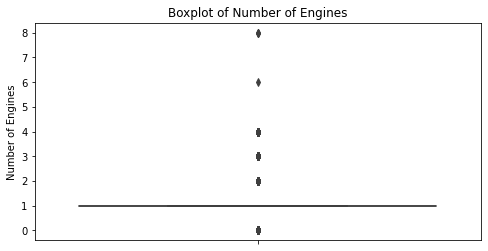

In [273]:
# Check for outliers in number_of_engines

plt.figure(figsize = (8, 4))
sns.boxplot(data = aviation_data, y = 'number_of_engines')
plt.title("Boxplot of Number of Engines")
plt.ylabel("Number of Engines")
plt.show()


In [275]:
# View rows with 8 engines
aviation_data[aviation_data['number_of_engines'] == 8.0]

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,make_model,engine_count_display,engine_type_display,engine_configuration,location_type
84080,20191019X90834,Accident,DCA20CA003,2019-10-17,"Tres Pinos, CA",United States,364845N,0121119W,NaN,NaN,...,0.0,VMC,Not Reported,a software timing error initiated by a battery...,26-09-2020,Kitty Hawk HEAVISIDE2,8.0,Electric,Electric - 8.0 Engine(s),Domestic
85148,20200803X34051,Accident,WPR20CA267,2020-08-03,"Jackson, WY",United States,433515N,1104940W,NaN,NaN,...,10.0,VMC,Not Reported,The balloon pilots inability to maintain the ...,26-08-2021,Cameron A 315,8.0,Lr,Lr - 8.0 Engine(s),Domestic
85149,20200803X34135,Accident,WPR20CA263,2020-08-03,"Jackson, WY",United States,433515N,1104940W,NaN,NaN,...,1.0,VMC,Not Reported,The pilots inability to arrest the descent ra...,26-08-2021,Lindstrand 310A,8.0,Lr,Lr - 8.0 Engine(s),Domestic


**Comment on outliers:** These are genuine outliers as some airplanes like the Kitty Hawk HEAVISIDE2, Cameron A315 and Lindstrand 310A contain 8 engines total.

### 9. Cleaning the 'broad_phase_of_flight' Column

The 'broad_phase_of_flight' column indicates the flight stage during which the incident occurred (e.g Takeoff, Landing, Cruise). This information is useful for risk profiling across different operational phases.

In [ ]:
# Check null count
print("Null Values in 'broad_phase_of_flight':", aviation_data['broad_phase_of_flight'].isna().sum())

# Check unique value counts to better understand the situation
print("\nUnique value count for 'broad_phase_of_flight':\n", aviation_data['broad_phase_of_flight'].value_counts())

Null Values in 'broad_phase_of_flight': 27165

Unique value count for 'broad_phase_of_flight':
 Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: broad_phase_of_flight, dtype: int64


**Missing Data**:
  - 'nan' values are unreported or unlogged incidents and will thus be replaced with 'Not Reported' to retain transparency and clarity without distorting the original data.
  - Entries marked as 'Unknown' or 'Other' shall be left as-is because they represent valid, albeit ambiguous, information that could still hold analytical value.
  - Preserving 'Unknown' acknowledges cases where the investigation could not determine the flight phase

In [255]:
# ==================== [Clean braod_phase_of_flight] ===================

# nan - not logged. Replace with 'Not Reported'
# Unknown - logged but indeterminable. Leave as is.
# Other - could be other causes e.g parachuting. Leave as is.

aviation_data['broad_phase_of_flight'] = aviation_data['broad_phase_of_flight'].fillna('Not Reported')

# Preview
print("\nNull Values after imputation:", aviation_data['broad_phase_of_flight'].isna().sum())

# See results after imputation
print("\nNew value counts after imputation:\n", aviation_data['broad_phase_of_flight'].value_counts())


Null Values after imputation: 0

New value counts after imputation:
 Not Reported    27165
Landing         15428
Takeoff         12493
Cruise          10269
Maneuvering      8144
Approach         6546
Climb            2034
Taxi             1958
Descent          1887
Go-around        1353
Standing          945
Unknown           548
Other             119
Name: broad_phase_of_flight, dtype: int64


### 10. Cleaning the 'amateur_built' Column

'amateur_built' indicates whether the aircraft was home-built. This attribute may relate to maintenance quality or design variance and is important when profiling risk by aircraft origin.

In [ ]:
# Check null value count
print("Null values in 'amateur_built':", aviation_data['amateur_built'].isna().sum())

# Unique value counts 
print("\nUnique value count before imputation:\n", aviation_data['amateur_built'].value_counts())

Null values in 'amateur_built': 102

Unique value count before imputation:
 No     80312
Yes     8475
Name: amateur_built, dtype: int64


**Handling Missing Values**:
  Nulls in this column likely represent cases where the builder status was not documented. Instead of assuming values like 'No' (the most common), I will fill these with 'Not Reported' to preserve the integrity of the dataset and avoid introducing bias.

**Why Not Use Mode?**:
  Using the mode would disproportionately skew the dataset toward the majority class ('No'), which may obscure meaningful patterns in the analysis. By using 'Not Reported', I maintain clarity on which entries were actually incomplete.

This cleaning ensures that the column remains analytically useful while remaining faithful to the original reporting limitations.

In [257]:
# ==================== [Clean amateur_built] ====================

# Resort to leaving the nulls as they are and add a placeholder: 'Not Reported'
# This maintains data authenticity and removes bias or assumptions introduced by using mode

aviation_data['amateur_built'] = aviation_data['amateur_built'].fillna('Not Reported')

# Confirm null values have been handled
print("Null values after imputation:", aviation_data['amateur_built'].isna().sum())

# Check unique counts after imputation
print("\nUnique counts after imputation:\n", aviation_data['amateur_built'].value_counts())

Null values after imputation: 0

Unique counts after imputation:
 No              80312
Yes              8475
Not Reported      102
Name: amateur_built, dtype: int64


In [258]:
# =================== [11. total_fatal_injuries] ====================

# # Check for null value counts
# print("Null values in 'total_fatal_injuries':", aviation_data['total_fatal_injuries'].isna().sum())

# # Check unique values in the column
# print("\nUnique values in 'total_fatal_injuries':\n", aviation_data['total_fatal_injuries'].unique())


# # ==================== [Clean total_fatal_injuries] ====================

# # nan - Not recorded so replace with 'Not Reported'
# # Maintain float values as they can coexist with strings 

# aviation_data['total_fatal_injuries'] = aviation_data['total_fatal_injuries'].fillna('Not Reported')


# Commented this out because the values correspond with those in injury_severity
# Will shelve it for now

### 11. Cleaning and Standardizing the 'country' Column

Addressing inconsistencies and missing values in the 'country' column, which identifies the location of each aviation event.

- **Standardization**: Remove whitespace and ensure consistent capitalization (e.g. 'united states' becomes 'United States').
- **Missing Values**: Imputed with 'Not Recorded' to reflect the absence of data without making assumptions.

Create a new column, 'location_type', to distinguish whether the event occurred domestically or internationally:

- If 'country' is 'United States', label as **Domestic**.
- All other values will be **International**.

In [ ]:
# Check null counts
print("Null values in 'country':", aviation_data['country'].isna().sum())

# Standardise country column
aviation_data['country'] = aviation_data['country'].str.strip().str.title()

# nan - not recorded. Imputing method- 'Not Recorded'

aviation_data['country'] = aviation_data['country'].fillna('Not Recorded')
print("\nNull count after imputation:", aviation_data['country'].isna().sum())

# Flag country as either domestic or international.
# Since this dataset is largely US based, the domestica country will be 'United States'. All else will be 'International'
domestic_country = 'United States'
aviation_data['location_type'] = aviation_data['country'].apply(lambda x: 'Domestic' if x == domestic_country else 'International')
aviation_data['location_type'].value_counts()

Null values in 'country': 226

Null count after imputation: 0


Domestic         82248
International     6641
Name: location_type, dtype: int64

In [260]:
# ==================== [Archive Columns for Later Use] ====================

# Define columns to archive
archived_cols = {
    'investigation_type',
    'event_date',
    'location',
    'aircraft_category',
    'publication_date',
    'latitude',
    'longitude',
    'airport_name',
    'far_description',
    'report_status',
    'registration_number',
    'schedule',  # High null rate (~85%)
    'accident_number',
    'airport_code',
    'air_carrier',
    'total_minor_injuries',
    'total_serious_injuries',
    'total_uninjured',
    'number_of_engines',
    'total_fatal_injuries'
}

# Separate them from the main dataset
archived_df = aviation_data[archived_cols]
aviation_df = aviation_data.drop(columns = archived_cols)

# Save both datasets to separate CSV files
aviation_df.to_csv("CleanedAviationData.csv", index = False)
archived_df.to_csv("ArchivedAviationData.csv", index = False)

In [261]:
# ==================== [Load cleaned dataset and confirm it's readiness for analysis] ===================

aviation_df = pd.read_csv(r'CleanedAviationData.csv', encoding = 'ISO-8859-1')

aviation_df.head()


,event_id,country,injury_severity,aircraft_damage,make,model,amateur_built,engine_type,purpose_of_flight,weather_condition,broad_phase_of_flight,make_model,engine_count_display,engine_type_display,engine_configuration,location_type
0,20001218X45444,United States,Fatal,Destroyed,Stinson,108-3,No,Reciprocating,Personal,Unknown,Cruise,Stinson 108-3,1.0,Reciprocating,Reciprocating - 1.0 Engine(s),Domestic
1,20001218X45447,United States,Fatal,Destroyed,Piper,PA24-180,No,Reciprocating,Personal,Unknown,Unknown,Piper PA24-180,1.0,Reciprocating,Reciprocating - 1.0 Engine(s),Domestic
2,20061025X01555,United States,Fatal,Destroyed,Cessna,172M,No,Reciprocating,Personal,IMC,Cruise,Cessna 172M,1.0,Reciprocating,Reciprocating - 1.0 Engine(s),Domestic
3,20001218X45448,United States,Fatal,Destroyed,Rockwell,112,No,Reciprocating,Personal,IMC,Cruise,Rockwell 112,1.0,Reciprocating,Reciprocating - 1.0 Engine(s),Domestic
4,20041105X01764,United States,Fatal,Destroyed,Cessna,501,No,Not Reported,Personal,VMC,Approach,Cessna 501,Not Reported,Not Reported,Not Reported - Not Reported Engine(s),Domestic


In [262]:
# ==================== [IDE - Initial Data Exploration] ====================

# See number of rows and columns
print(f"The dataset contains {aviation_df.shape[0]} rows and {aviation_df.shape[1]} columns\n")

# Print column names to check for standardization/renaming needs
print("Column Names:\n", aviation_df.columns, "\n")

The dataset contains 88889 rows and 16 columns

Column Names:
 Index(['event_id', 'country', 'injury_severity', 'aircraft_damage', 'make',
       'model', 'amateur_built', 'engine_type', 'purpose_of_flight',
       'weather_condition', 'broad_phase_of_flight', 'make_model',
       'engine_count_display', 'engine_type_display', 'engine_configuration',
       'location_type'],
      dtype='object') 



In [263]:
# Get metadat
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   event_id               88889 non-null  object
 1   country                88889 non-null  object
 2   injury_severity        88889 non-null  object
 3   aircraft_damage        88889 non-null  object
 4   make                   88889 non-null  object
 5   model                  88889 non-null  object
 6   amateur_built          88889 non-null  object
 7   engine_type            88889 non-null  object
 8   purpose_of_flight      88889 non-null  object
 9   weather_condition      88889 non-null  object
 10  broad_phase_of_flight  88889 non-null  object
 11  make_model             88889 non-null  object
 12  engine_count_display   88889 non-null  object
 13  engine_type_display    88889 non-null  object
 14  engine_configuration   88889 non-null  object
 15  location_type      

In [264]:
# Check summary statistics number_of_engines
aviation_df.describe()

,event_id,country,injury_severity,aircraft_damage,make,model,amateur_built,engine_type,purpose_of_flight,weather_condition,broad_phase_of_flight,make_model,engine_count_display,engine_type_display,engine_configuration,location_type
count,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889
unique,87951,216,5,5,7588,11647,3,12,25,4,13,18296,8,12,50,2
top,20001214X45071,United States,No Injury,Substantial,Cessna,152,No,Reciprocating,Personal,VMC,Not Reported,Cessna 152,1.0,Reciprocating,Reciprocating - 1.0 Engine(s),Domestic
freq,3,82248,69576,64148,27149,2367,80312,69530,49448,77303,27165,2366,69582,69530,63001,82248


In [265]:
# Get basic statistics of categorical columns
aviation_df.describe(include = 'O').T

,count,unique,top,freq
event_id,88889,87951,20001214X45071,3
country,88889,216,United States,82248
injury_severity,88889,5,No Injury,69576
aircraft_damage,88889,5,Substantial,64148
make,88889,7588,Cessna,27149
model,88889,11647,152,2367
amateur_built,88889,3,No,80312
engine_type,88889,12,Reciprocating,69530
purpose_of_flight,88889,25,Personal,49448
weather_condition,88889,4,VMC,77303


In [266]:
# See if there are any duplicated values
aviation_df.duplicated().sum()

28

### Why 28 Duplicates Appeared After Cleaning

When inspecting the raw data source, no duplicate rows were detected. However, after cleaning and feature engineering, 28 duplicates duplicate values appeared.

#### Why Did This Happen?
The cleaning process involved:
- Filling missing values with standard placeholders (e.g 'Not Reported').
- Standardizing strings (e.g (.str.strip().str.title())).
- Creating new composite features like make_model and engine_configuration.

These transformations homogenized previously unique rows that differed only in whitespace, casing, or missing values.

For example:
- One row may have had "Cessna" and another "  cessna " - after cleaning, both become "Cessna".
- Missing values in some columns filled with the same placeholder ('Not Reported') can cause distinct rows to collapse into identical ones.

#### Validating my decision to Drop Them
These 28 rows are now exact copies and add no new information. Removing them:
- Improves analysis accuracy.
- Prevents bias in visualizations and aggregations.
- Preserves semantic integrity, since only exact row-level duplication is removed — not multi-aircraft entries under the same event_id.

**Final Conclusion:** The duplicates didn’t exist before cleaning but were introduced as a side effect of standardization — and should be removed.

In [267]:
aviation_df = aviation_df.drop_duplicates()

print("Preview duplicates after dropping:", aviation_df.duplicated().sum())

Preview duplicates after dropping: 0


In [270]:
# New shape
print(f"The dataset contains {aviation_df.shape[0]} rows and {aviation_df.shape[1]} columns")

The dataset contains 88861 rows and 16 columns


In [268]:
aviation_df.isna().sum()

event_id                 0
country                  0
injury_severity          0
aircraft_damage          0
make                     0
model                    0
amateur_built            0
engine_type              0
purpose_of_flight        0
weather_condition        0
broad_phase_of_flight    0
make_model               0
engine_count_display     0
engine_type_display      0
engine_configuration     0
location_type            0
dtype: int64

### UNIVARIATE ANALYSIS

Time to explore the distribution of individual features in the dataset- FINALLY!!
 
**Goal:** Understand the frequency, structure, and spread of each variable on its own.

Plots and frequency counts will be used to identify the dominant values, any imbalance in categories, and insights relevant for further bivariate and multivariate analysis.

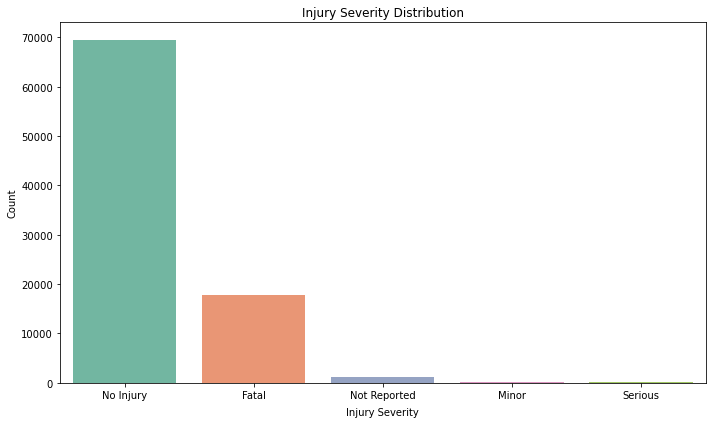

In [ ]:
# Set plot style
plt.figure(figsize = (10, 6))
sns.countplot(data = aviation_df, x = 'injury_severity', order = aviation_df['injury_severity'].value_counts().index, palette = 'Set2')

# Add labels and title
plt.title('Injury Severity Distribution')
plt.xlabel('Injury Severity', labelpad = 7)
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()